<a href="https://colab.research.google.com/github/anavlajovic/domaci/blob/main/Prvi_pismeni_prakticni_deo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prakticni deo

Napraviti linearni model koji ce modelovati ciljanu promenjivu.

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3.0,NaN,1,1.0,3,NaN,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3.0,3.0,1,NaN,3,4.0,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3.0,NaN,2,NaN,3,10.0,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2.0,NaN,1,1.0,5,2.0,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3.0,2.0,1,NaN,5,4.0,10
5,5,GP,M,16,U,LE3,T,4,3,services,...,yes,no,5,4.0,2.0,1,2.0,5,10.0,15
6,6,GP,M,16,U,LE3,T,2,2,other,...,yes,no,4,4.0,NaN,1,1.0,3,NaN,11
7,7,GP,F,17,U,GT3,A,4,4,other,...,no,no,4,1.0,NaN,1,NaN,1,6.0,6
8,8,GP,M,15,U,LE3,A,3,2,services,...,yes,no,4,2.0,2.0,1,NaN,1,NaN,19
9,9,GP,M,15,U,GT3,T,3,4,other,...,yes,no,5,5.0,NaN,1,NaN,5,0.0,15


<Axes: >

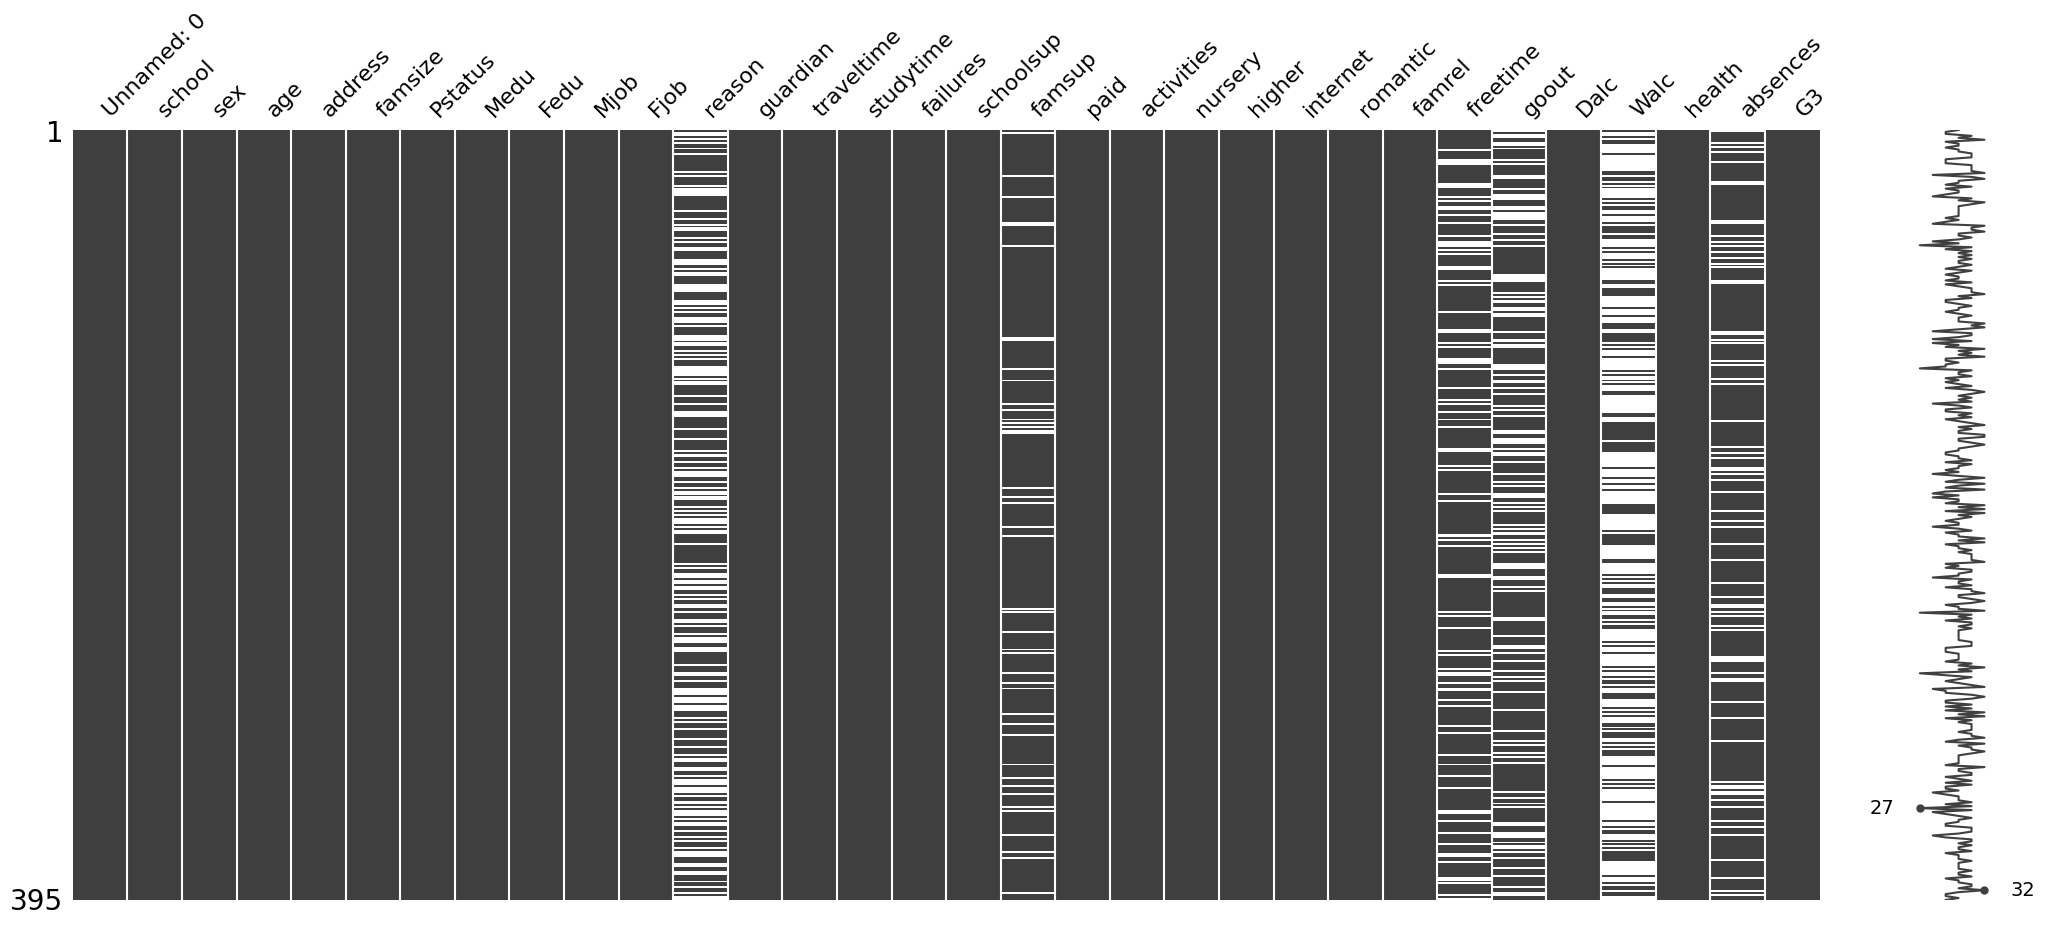

In [87]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier


df= pd.read_csv("dataset.csv")
display(df.head(10))

msno.matrix(df)

In [88]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Unnamed: 0     0.000000
school         0.000000
sex            0.000000
age            0.000000
address        0.000000
famsize        0.000000
Pstatus        0.000000
Medu           0.000000
Fedu           0.000000
Mjob           0.000000
Fjob           0.000000
reason        42.784810
guardian       0.000000
traveltime     0.000000
studytime      0.000000
failures       0.000000
schoolsup      0.000000
famsup        10.886076
paid           0.000000
activities     0.000000
nursery        0.000000
higher         0.000000
internet       0.000000
romantic       0.000000
famrel         0.000000
freetime      20.759494
goout         30.886076
Dalc           0.000000
Walc          61.772152
health         0.000000
absences      17.974684
G3             0.000000
dtype: float64


<Axes: >

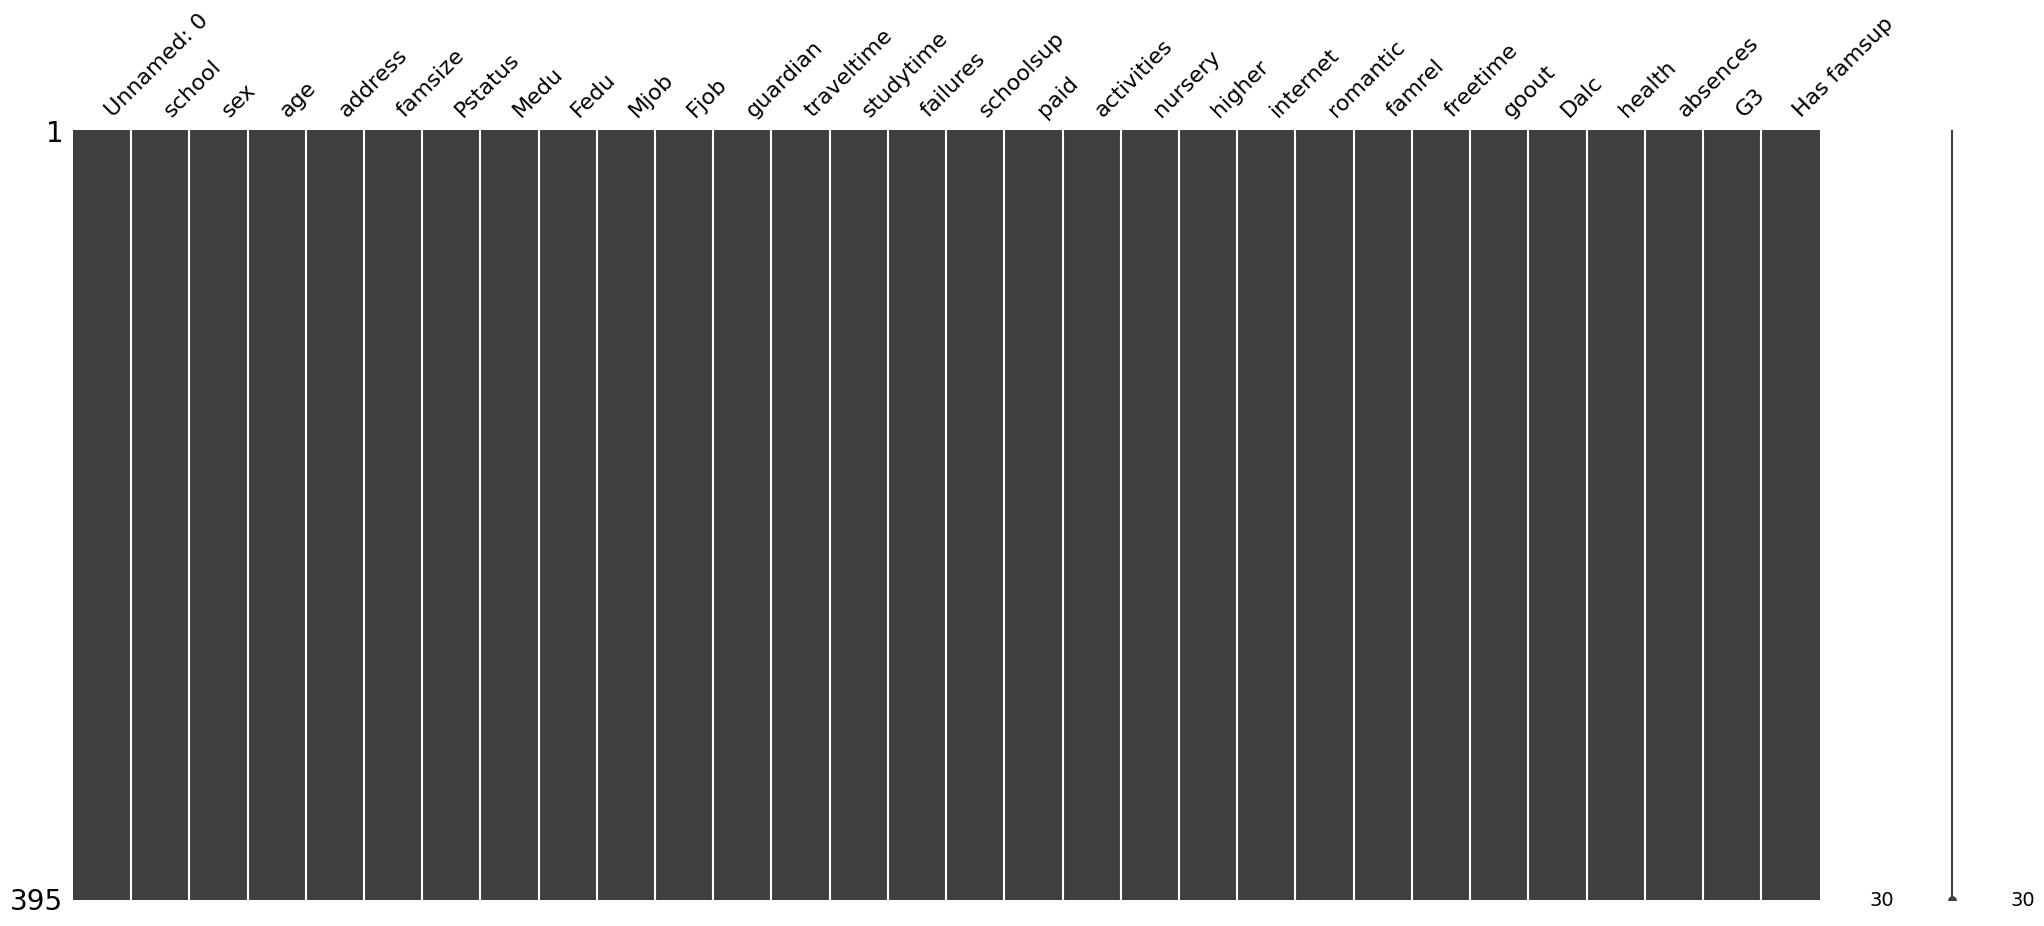

In [89]:
df['freetime'] = df['freetime'].fillna(df['freetime'].median())
df['Has famsup'] = df['famsup'].isna().apply(lambda x: not x)
df['goout'] = df['goout'].fillna(df['goout'].median())
df['absences'] = df['absences'].fillna(df['absences'].median())
df= df.drop(columns=["famsup", "Walc", "reason"]) #dropujem Walc i reason jer prevelik procenat podataka nedostaje
msno.matrix(df)


In [90]:
display(df.head())

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,health,absences,G3,Has famsup
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3.0,3.0,1,3,4.0,6,True
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3.0,3.0,1,3,4.0,6,False
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3.0,3.0,2,3,10.0,10,True
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2.0,3.0,1,5,2.0,15,True
4,4,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3.0,2.0,1,5,4.0,10,True


In [91]:
cat= ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "guardian", "schoolsup", "Has famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"] #kategorijske promenljive

df= pd.get_dummies(df,columns= cat, drop_first = True)

y= df["G3"]
X= df.drop(columns= ["G3"])
X.head()
print(X.shape)
y= pd.get_dummies(y, drop_first= True)
y.head()
X.columns= X.columns.astype(str)
display(df.head())

Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size= 0.2)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(395, 36)


,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian_mother,guardian_other,schoolsup_yes,Has famsup_True,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,18,4,4,2,2,0,4,3.0,3.0,...,1,0,1,1,0,0,1,1,0,0
1,1,17,1,1,1,2,0,5,3.0,3.0,...,0,0,0,0,0,0,0,1,1,0
2,2,15,1,1,1,2,3,4,3.0,3.0,...,1,0,1,1,1,0,1,1,1,0
3,3,15,4,2,1,3,0,3,2.0,3.0,...,1,0,0,1,1,1,1,1,1,1
4,4,16,3,3,1,2,0,4,3.0,2.0,...,0,0,0,1,1,0,1,1,0,0


(316, 36) (316, 17) (79, 36) (79, 17)


In [92]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

y= df['G3']
X= df.drop(columns= ['G3'])
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, test_size=0.2)
model.fit(X_train, y_train)

LinearRegression()

In [93]:
from sklearn.metrics import mean_squared_error
import math

y_true = y_test
y_pred = model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

4.094781824009468


## Ucitavanje podataka

Koliko ima slucajeva u skupu podataka?
Koliko ima nezavisnih promenjivih u skupu podataka?

jedna nezavisna promenljiva - G3, a 30 slučajeva, tj. zavisnih promenljivih

## Preprocesiranje podataka

Da li postoje nedostajuce vrednosti?
Koje sve promenjive imaju nedostajuce vrednosti?
Kako cete resiti nedostajuce vrednosti? Zbog cega?
Nakon preprocesiranja, koliko imamo nezavisnih promenjivih?
Kog su tipa nezavisne promenjive?


In [ ]:
postoje, promenljive Walc, reason, freetime, famsup, goout, absences
neke sam rešila iybacivanjem kolone(velik procenat nedostajanja), a neke unošenjem vrednosti, neke koje su nominalnog ipa sam rešila tako što je NaN pretvoreno u false

## Obucavanje modela

Kako definisete model?
Sta su ulazni podaci u model a sta izlazni?
Koju metriku koristite da ocenite valjanost modela? Zasto?
Koju metodu obuke koristi ovaj model?
Koliko parametara ima ovaj model?

rmse yato sto je najbolja metrika ya problem linearne regresije(diferencijabilna f-ja) metoda obuke je one hot encoding- dummies

## Evaluacija modela

Kakvi su rezultati modela?
Da li je model bolji od modela koji nasumicno vraca izlaz?


rmse= 4,094